![](https://images.aicrowd.com/raw_images/challenges/banner_file/1004/51b3abd65e4964c62778.jpg)

<h2><center> Getting Started with Speaker Identification</center></h2>

In this puzzle, we have to cluster the sentences spoken by same speaker together. 

In this starter notebook:
> For tokenization: We will use **TfidfVectorizer**. 

> For Clustering: We will use **K Means Classifier**.




# Download the files 💾
## Download AIcrowd CLI

We will first install aicrowd-cli which will help you download and later make submission directly via the notebook.


In [1]:
!pip install aicrowd-cli
%load_ext aicrowd.magic

     |████████████████████████████████| 44 kB 952 kB/s 
     |████████████████████████████████| 214 kB 8.9 MB/s 
     |████████████████████████████████| 170 kB 37.6 MB/s 
     |████████████████████████████████| 1.1 MB 18.5 MB/s 
     |████████████████████████████████| 63 kB 541 kB/s 
     |████████████████████████████████| 54 kB 802 kB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 51 kB 4.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 22.3.0
    Uninstalling pyzmq-22.3.0:
      Successfully uninstalled pyzmq-22.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have


## Login to AIcrowd ㊗


In [2]:
%aicrowd login

Please login here: https://api.aicrowd.com/auth/QFFvWdfD4t9PBd8lTVlLsNY17etqW2i4pR2Q2SYY2Mo
API Key valid
Saved API Key successfully!



## Download Dataset

We will create a folder name data and download the files there.


In [3]:
!rm -rf data
!mkdir data
%aicrowd ds dl -c speaker-identification -o data

sample_sub.csv:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/424k [00:00<?, ?B/s]

In [4]:
import re,os
import pandas as pd

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans #, AgglomerativeClustering

In [5]:
test_df = pd.read_csv("data/test.csv")

In [6]:
test_df.head()

id                                           sentence
0  19475  If you sit back and think about all that, that...
1  35980  oh my goodness i've run it again i wasn't mean...
2  12979  So I think that the whole world has moved towa...
3  40815  since I think it would be lame to not post any...
4  43475  And now, let’s use this new technique to\nappl...

In [7]:
test_df.sentence[0]

"If you sit back and think about all that, that’s a lot of layers of complexity to wrap your mind around. So don't worry if it takes time for your mind to digest it all."

In [8]:
sub_df = pd.read_csv("data/sample_sub.csv")

In [9]:
sub_df.head()

id  prediction
0  19475         NaN
1  35980         NaN
2  12979         NaN
3  40815         NaN
4  43475         NaN

In [10]:
# Remove punctuation, new line and lower case all the text available in sentence
test_df.sentence = test_df.sentence.apply(lambda x: re.sub('[,\.!?]', '', x))
test_df.sentence = test_df.sentence.apply(lambda x: x.lower())
test_df.sentence = test_df.sentence.apply(lambda x: x.replace("\n", " "))

In [11]:
test_df.sentence.values

array(["if you sit back and think about all that that’s a lot of layers of complexity to wrap your mind around so don't worry if it takes time for your mind to digest it all",
       "oh my goodness i've run it again i wasn't meant to click that that's all right it should still work and then gradio look how easy it turns your python functions into an interface so if i type in my name daniel submit is this going to work oh no because the cell's not running that's all right ignore that we want to go for the big dog demo",
       'so i think that the whole world has moved toward using bigger than three datasets right digital civil society which is a lot of data and so for a lot of problems we have a lot of data i would probably use logistic regression',
       ...,
       "actually the video i did previously we talked about the relationship between the slope and the actual correlation okay so if you're interested in that look at the previous video does the confidence interval for the slop

In [12]:
test_df.head()

id                                           sentence
0  19475  if you sit back and think about all that that’...
1  35980  oh my goodness i've run it again i wasn't mean...
2  12979  so i think that the whole world has moved towa...
3  40815  since i think it would be lame to not post any...
4  43475  and now let’s use this new technique to apply ...

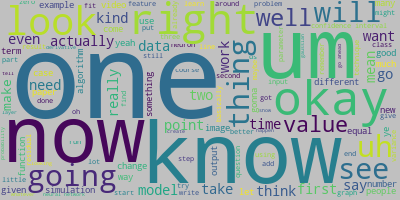

In [13]:
long_string = ','.join(list(test_df.sentence.values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="silver", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [14]:
vectorizer = TfidfVectorizer()# stop_words='english')
X = vectorizer.fit_transform(test_df.sentence)

In [15]:
X[0].todense().shape

(1, 4829)

# Generating Predictions
Clustering using K-Means.

In [16]:
true_k = 10
#model = KMeans(n_clusters=true_k, init='k-means++', max_iter=1000)
#model = KMeans(n_clusters=true_k, init='k-means++', max_iter=5000)#, n_init=10)
model = KMeans(n_clusters=true_k, max_iter=2500, algorithm='full')
#model = MiniBatchKMeans(n_clusters=true_k)
#model = AgglomerativeClustering(n_clusters=true_k)

In [17]:
model.fit(X)

KMeans(algorithm='full', max_iter=2500, n_clusters=10)

In [18]:
submission = test_df

In [19]:
submission['prediction'] = test_df.sentence.apply(lambda x: model.predict(vectorizer.transform([x])[0])[0])

In [20]:
submission.head()

id                                           sentence  prediction
0  19475  if you sit back and think about all that that’...           0
1  35980  oh my goodness i've run it again i wasn't mean...           2
2  12979  so i think that the whole world has moved towa...           7
3  40815  since i think it would be lame to not post any...           2
4  43475  and now let’s use this new technique to apply ...           6

In [ ]:
!rm -rf assets
!mkdir assets
submission.to_csv(os.path.join("assets", "submission.csv"))


# Submitting our Predictions

Note : Please save the notebook before submitting it (Ctrl + S)


In [ ]:
%aicrowd notebook submit -c speaker-identification -a assets --no-verify